<div style="text-align: center"><h1>Twitter/X Sentiment Analysis<h1></div>

The data is collection of several tweets on the social media platform 'X'.
It has been analysed and a classification model has been built using **Naive Bayes** algorithm.   
This ml algorithm assumes independant features and is probabilistic classifier based on Bayes theorem.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import string
import re
import contractions
import emoji
import nltk
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('sentiment_analysis.csv')
df.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [3]:
# id is not required.
df.drop(columns=('id'), axis=1, inplace=True)
df.columns

Index(['label', 'tweet'], dtype='object')

In [4]:
df.shape

(7920, 2)

## Data Cleaning

In [5]:
#checking for missing values
df.isna().sum()

label    0
tweet    0
dtype: int64

In [6]:
df.dtypes

label     int64
tweet    object
dtype: object

In [7]:
df.describe()

,label
count,7920.000000
mean,0.255808
std,0.436342
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [8]:
df['label'].value_counts()

label
0    5894
1    2026
Name: count, dtype: int64

*There is imbalance in data*

In [9]:
# calculationg length of tweets
df['length'] = df['tweet'].str.len()

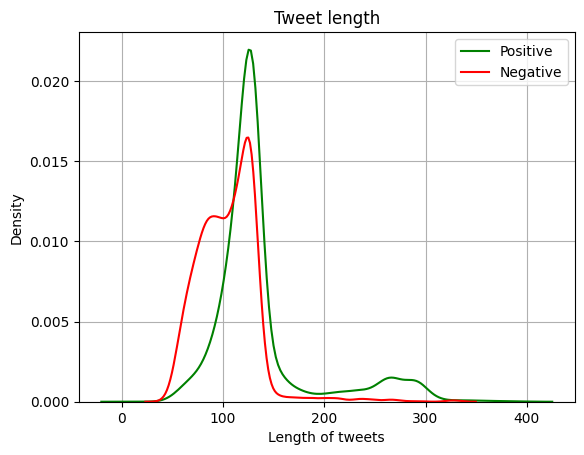

In [10]:
positive = df[df['label']==0]
negative = df[df['label']==1]

sns.distplot(x=positive['length'], hist=False, color='green', label='Positive')
sns.distplot(x=negative['length'], hist=False, color='red',label='Negative')
plt.title('Tweet length')
plt.xlabel('Length of tweets')
plt.legend()
plt.grid()
plt.show()

#### Textual data cleaning

In [11]:
#function to clean text 

def clean_text(text):
    text = text.lower() 
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  
    text = contractions.fix(text)  
    text = ''.join([i for i in text if i not in string.punctuation]) 
    text = re.sub('/n', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\.{2,}', ' ', text)
    text = re.sub(r'[<>]', '', text)
    text = ''.join([i for i in text if not i.isdigit()])
    text = emoji.replace_emoji(text, '')
    text = " ".join(text.split())
    return text

In [12]:
df['tweet'] = df['tweet'].apply(clean_text)
df.head()

,label,tweet,length
0,0,fingerprint pregnancy test android apps beauti...,128
1,0,finally a transparant silicon case thanks to m...,131
2,0,we love this would you go talk makememories un...,123
3,0,i am wired i know i am george i was made that ...,112
4,1,what amazing service apple will not even talk ...,124


In [13]:
# function to remove stopwords and lemmatize the tokens

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

wordlist = stopwords.words('english')
lemma = WordNetLemmatizer()

def text_lemmatize(message):
    tokens = word_tokenize(message)  # removing stopwords
    tokens = [i for i in tokens if i not in wordlist] # tokenizing
    tokens = " ".join([lemma.lemmatize(i) for i in tokens]) # lemmatizing
    return tokens

In [14]:
df['tweet'] = df['tweet'].apply(text_lemmatize)
df.head()

,label,tweet,length
0,0,fingerprint pregnancy test android apps beauti...,128
1,0,finally transparant silicon case thanks uncle ...,131
2,0,love would go talk makememories unplug relax i...,123
3,0,wired know george made way iphone cute daventr...,112
4,1,amazing service apple even talk question unles...,124


Wordcloud for positive tweets

In [15]:
pos_tweet = df[df['label']==0]
neg_tweet = df[df['label']==1]
pos_tweet_words = ' '.join(pos_tweet['tweet'].explode().astype('str'))
neg_tweet_words = " ".join(neg_tweet['tweet'].explode().astype('str'))

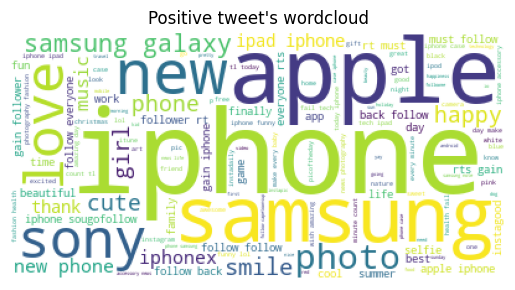

In [16]:
from wordcloud import WordCloud
wcloud = WordCloud(background_color= 'white').generate(pos_tweet_words)

plt.figure.figsize=(15,10)
plt.imshow(wcloud)
plt.axis('off')
plt.title("Positive tweet's wordcloud")
plt.show()

Wordcloud for negative tweets

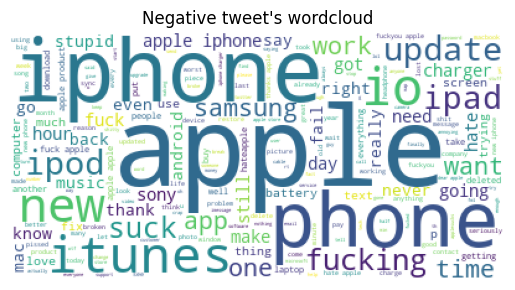

In [17]:
wcloud = WordCloud(background_color= 'white').generate(neg_tweet_words)
plt.figure.figsize=(15,10)
plt.imshow(wcloud)
plt.axis('off')
plt.title("Negative tweet's wordcloud")
plt.show()

## Brand wise Analysis

#### Analysis of Apple products related tweets

In [18]:
apple_wordlist =['apple','iphone','itunes','ipad','ipod']
def filter_apple(text):
    return any(i in text for i in apple_wordlist)
apple_df= df[df['tweet'].apply(filter_apple)] 
apple_df.shape

(5649, 3)

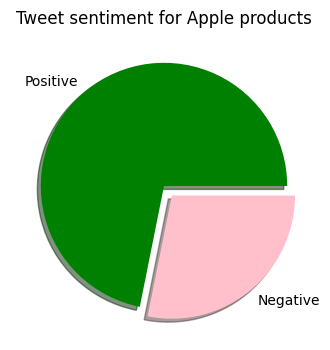

In [19]:
plt.figure(figsize=(4,4))
x= apple_df['label'].value_counts()
explode=[0,0.1]
plt.pie(x, labels= ['Positive', 'Negative'], colors=['green','pink'] , explode=explode, shadow=True)
plt.title("Tweet sentiment for Apple products")
plt.show()

#### Analysis of samsung product related tweets

In [20]:
samsung_wordlist =['samsung','samsung galaxy','galaxy']
def filter_samsung(text):
    return any(i in text for i in samsung_wordlist)
samsung_df= df[df['tweet'].apply(filter_samsung)] 
samsung_df.shape

(1361, 3)

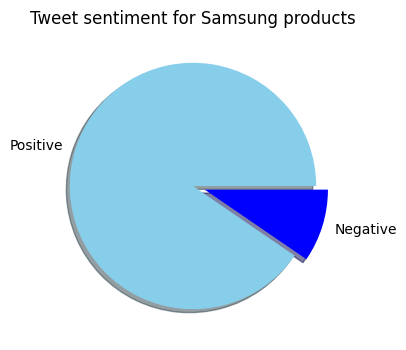

In [21]:
plt.figure(figsize=(4,4))
x= samsung_df['label'].value_counts()
explode=[0,0.1]
plt.pie(x, labels= ['Positive', 'Negative'], colors=['skyblue','blue'] , explode=explode, shadow=True)
plt.title("Tweet sentiment for Samsung products")
plt.show()

#### Analysis of Sony product related tweets

In [22]:
sony_wordlist =['sony']
def filter_sony(text):
    return any(i in text for i in sony_wordlist)
sony_df= df[df['tweet'].apply(filter_sony)] 
sony_df.shape

(781, 3)

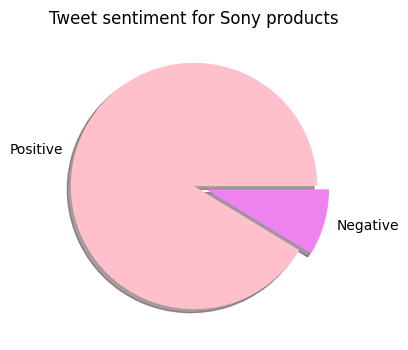

In [23]:
plt.figure(figsize=(4,4))
x= sony_df['label'].value_counts()
explode=[0,0.1]
plt.pie(x, labels= ['Positive', 'Negative'], colors=['pink','violet'] , explode=explode, shadow=True)
plt.title("Tweet sentiment for Sony products")
plt.show()

**Preprocessing**

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['tweet'])
y= df['label']

In [25]:
# splitting data into testing and training set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6336, 16465), (1584, 16465), (6336,), (1584,))

## Model Building

In [26]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Model Evaluation

Accuracy : 0.8819444444444444
Classification report :
               precision    recall  f1-score   support

           0       0.95      0.88      0.92      1152
           1       0.74      0.89      0.80       432

    accuracy                           0.88      1584
   macro avg       0.84      0.88      0.86      1584
weighted avg       0.89      0.88      0.89      1584



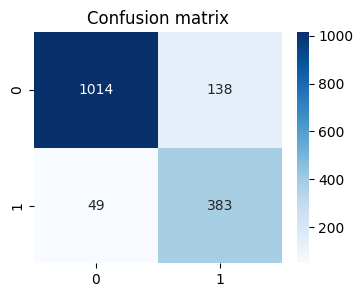

In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy : {accuracy}")
print(f"Classification report :\n {report}")

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot= True, fmt='d', cmap= 'Blues', xticklabels=['0', '1'], yticklabels=['0','1'])
plt.title('Confusion matrix')
plt.show()

## Model Enhancement

The data had more entries for positive labels than negative. 
Handeling bias by **Class Priority**

Accuracy : 0.8800505050505051
Classification report :
               precision    recall  f1-score   support

           0       0.96      0.87      0.91      1152
           1       0.73      0.90      0.80       432

    accuracy                           0.88      1584
   macro avg       0.84      0.88      0.86      1584
weighted avg       0.89      0.88      0.88      1584



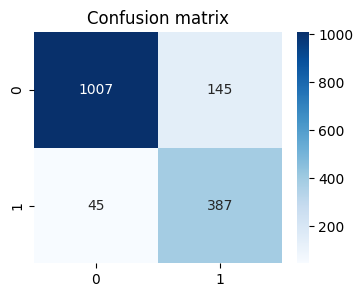

In [28]:
class_priority = [0.7,0.3]
model1 = MultinomialNB(class_prior= class_priority)
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm1 = confusion_matrix(y_test, y_pred)

print(f"Accuracy : {accuracy}")
print(f"Classification report :\n {report}")

plt.figure(figsize=(4,3))
sns.heatmap(cm1, annot= True, fmt='d', cmap= 'Blues', xticklabels=['0', '1'], yticklabels=['0','1'])
plt.title('Confusion matrix')
plt.show()

Recall for class 1 improved at expense of precision and scores for class 0. 

#### Oversampling

In [29]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy ='minority')
X_oversample, y_oversample = oversample.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_oversample, y_oversample, test_size=0.2, random_state=42)

Accuracy : 0.9113655640373197
Classification report :
               precision    recall  f1-score   support

           0       0.97      0.85      0.91      1179
           1       0.86      0.98      0.92      1179

    accuracy                           0.91      2358
   macro avg       0.92      0.91      0.91      2358
weighted avg       0.92      0.91      0.91      2358



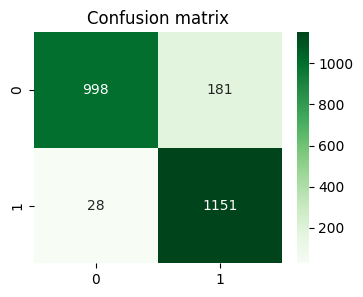

In [30]:
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm_nb = confusion_matrix(y_test, y_pred)

print(f"Accuracy : {accuracy}")
print(f"Classification report :\n {report}")

plt.figure(figsize=(4,3))
sns.heatmap(cm_nb, annot= True, fmt='d', cmap= 'Greens', xticklabels=['0', '1'], yticklabels=['0','1'])
plt.title('Confusion matrix')
plt.show()

Oversampling improved precision and recall values for minority class 1 as well as accuracy score of the model.